In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

In [6]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:527: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


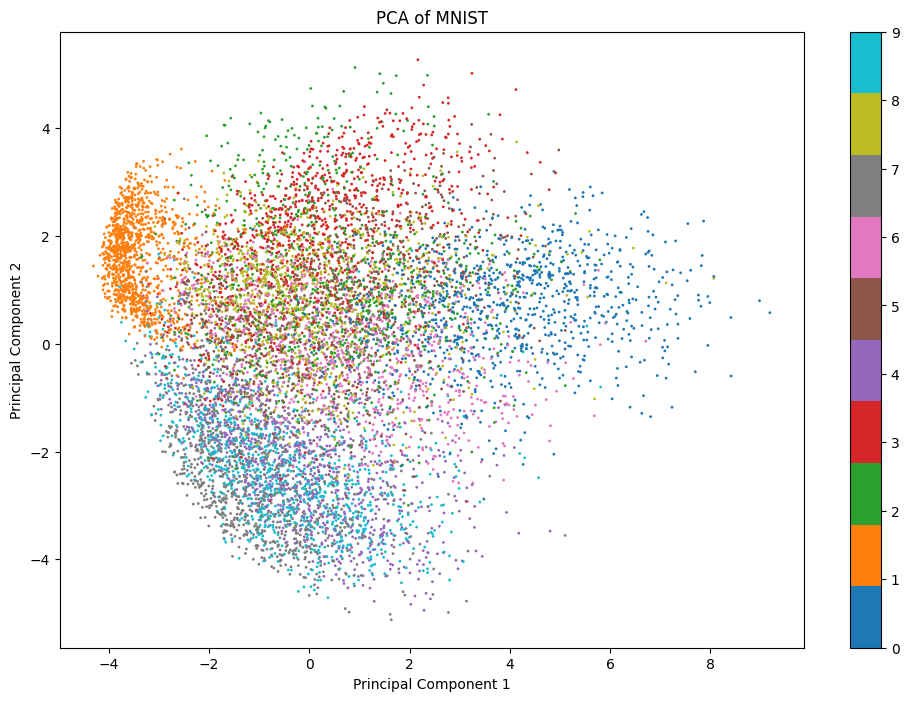

In [7]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [8]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

In [9]:
X_tsne.shape

(10000, 2)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:527: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


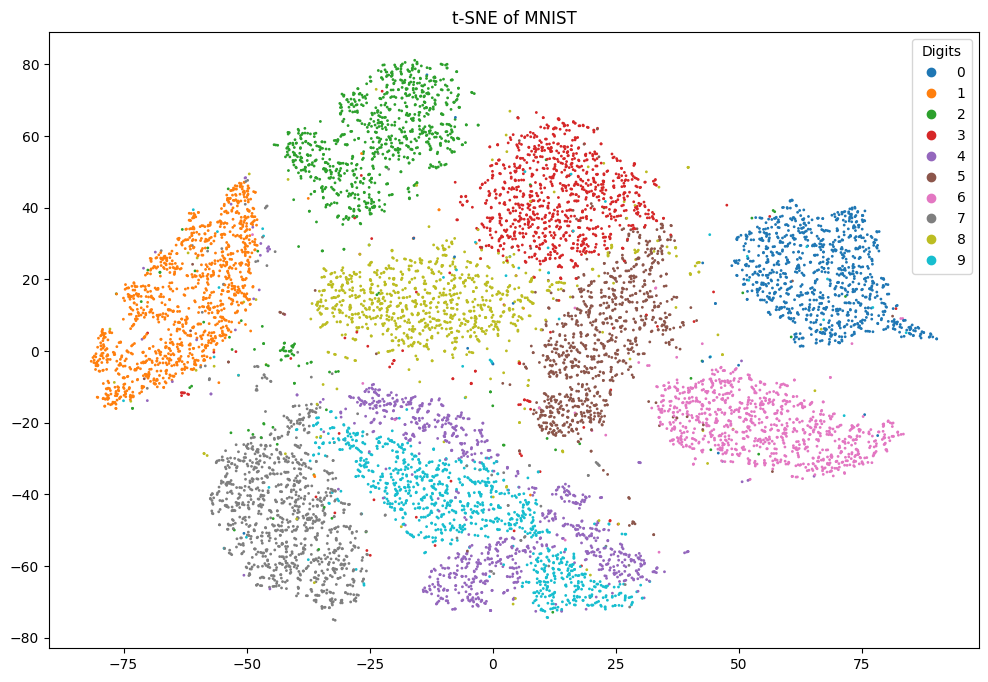

In [11]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()

In [12]:
tsne.embedding_

array([[ -8.438584 ,  15.34784  ],
       [ -1.1113973, -24.979437 ],
       [  9.553328 ,  22.603312 ],
       ...,
       [ 10.495765 ,  62.22204  ],
       [ 39.65905  ,  51.23783  ],
       [  2.4893973,  40.86465  ]], dtype=float32)

In [13]:
tsne.kl_divergence_

1.8177615404129028

In [14]:
tsne.learning_rate_

208.33333333333334

In [15]:
tsne.n_iter_

999

C:\Users\User\AppData\Local\Temp\ipykernel_40624\2096627392.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', s=10)
C:\Users\User\AppData\Local\Temp\ipykernel_40624\2096627392.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', s=10)
C:\Users\User\AppData\Local\Temp\ipykernel_40624\2096627392.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', s=10)
C:\Users\User\AppData\Local\Temp\ipykernel_40624\2096627392.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', s=10)
C:\Users\User\AppData\Local\Temp\ipykernel_40624\2096627392.py:14: UserWarning: No data for colo

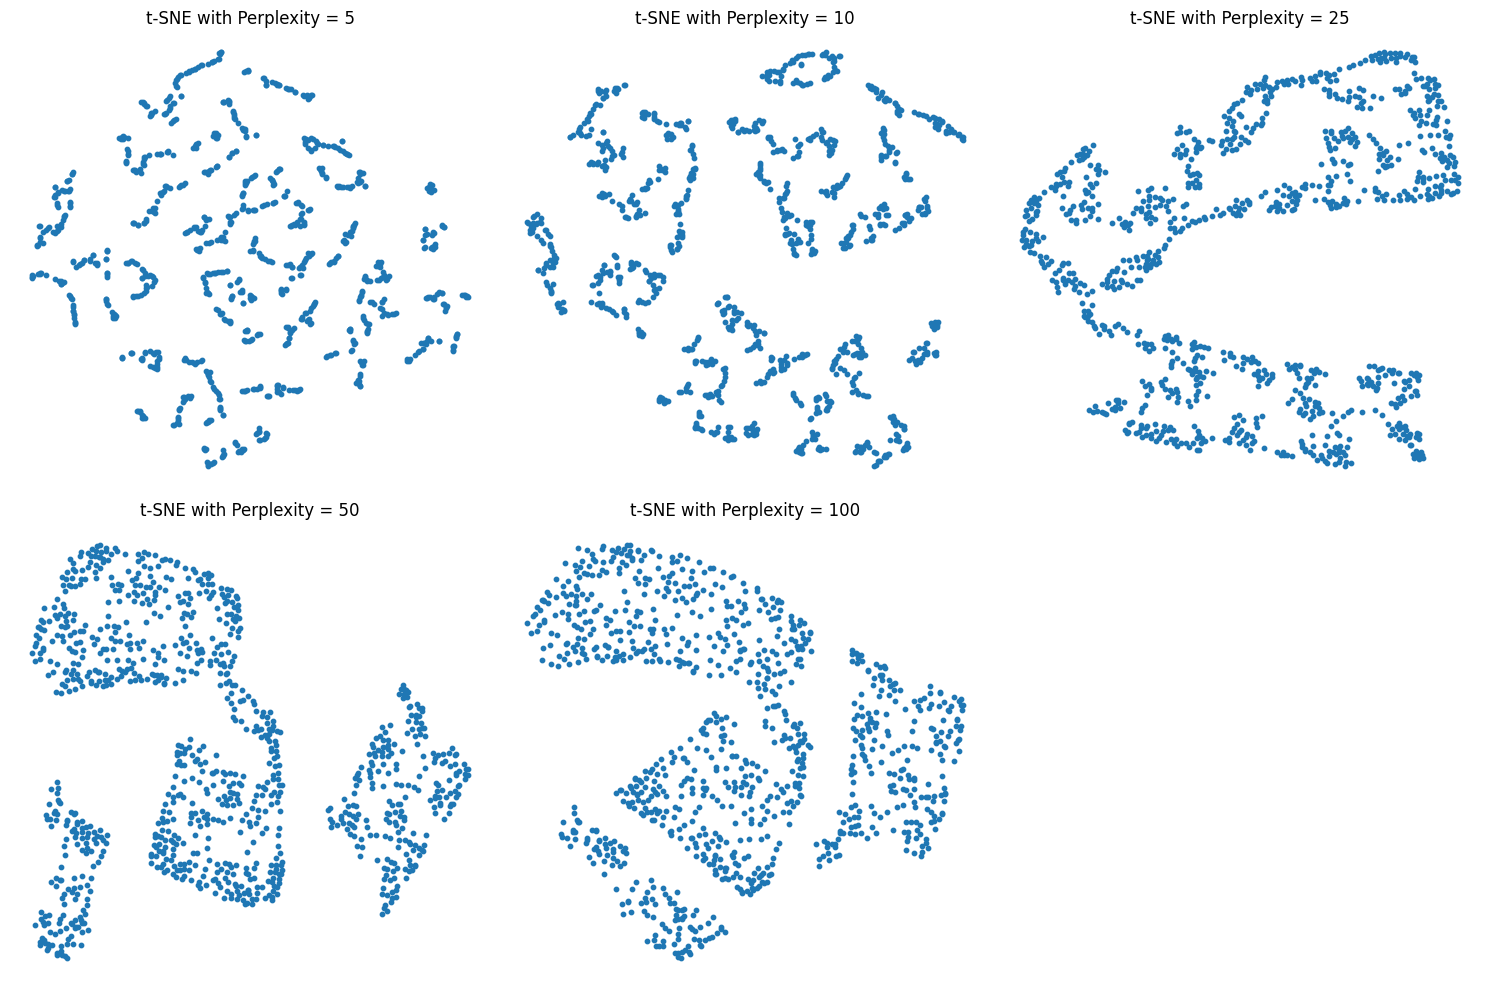

In [20]:
# Perplexity values to try
perplexities = [5, 10, 25, 50, 100]

# Prepare the plot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Apply t-SNE with different perplexity values and plot
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, learning_rate='auto')
    X_tsne = tsne.fit_transform(X)

    ax = axes[i]
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='jet', s=10)
    ax.set_title(f't-SNE with Perplexity = {perplexity}')
    ax.axis('off')

# Remove the empty subplot (if any)
for i in range(len(perplexities), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

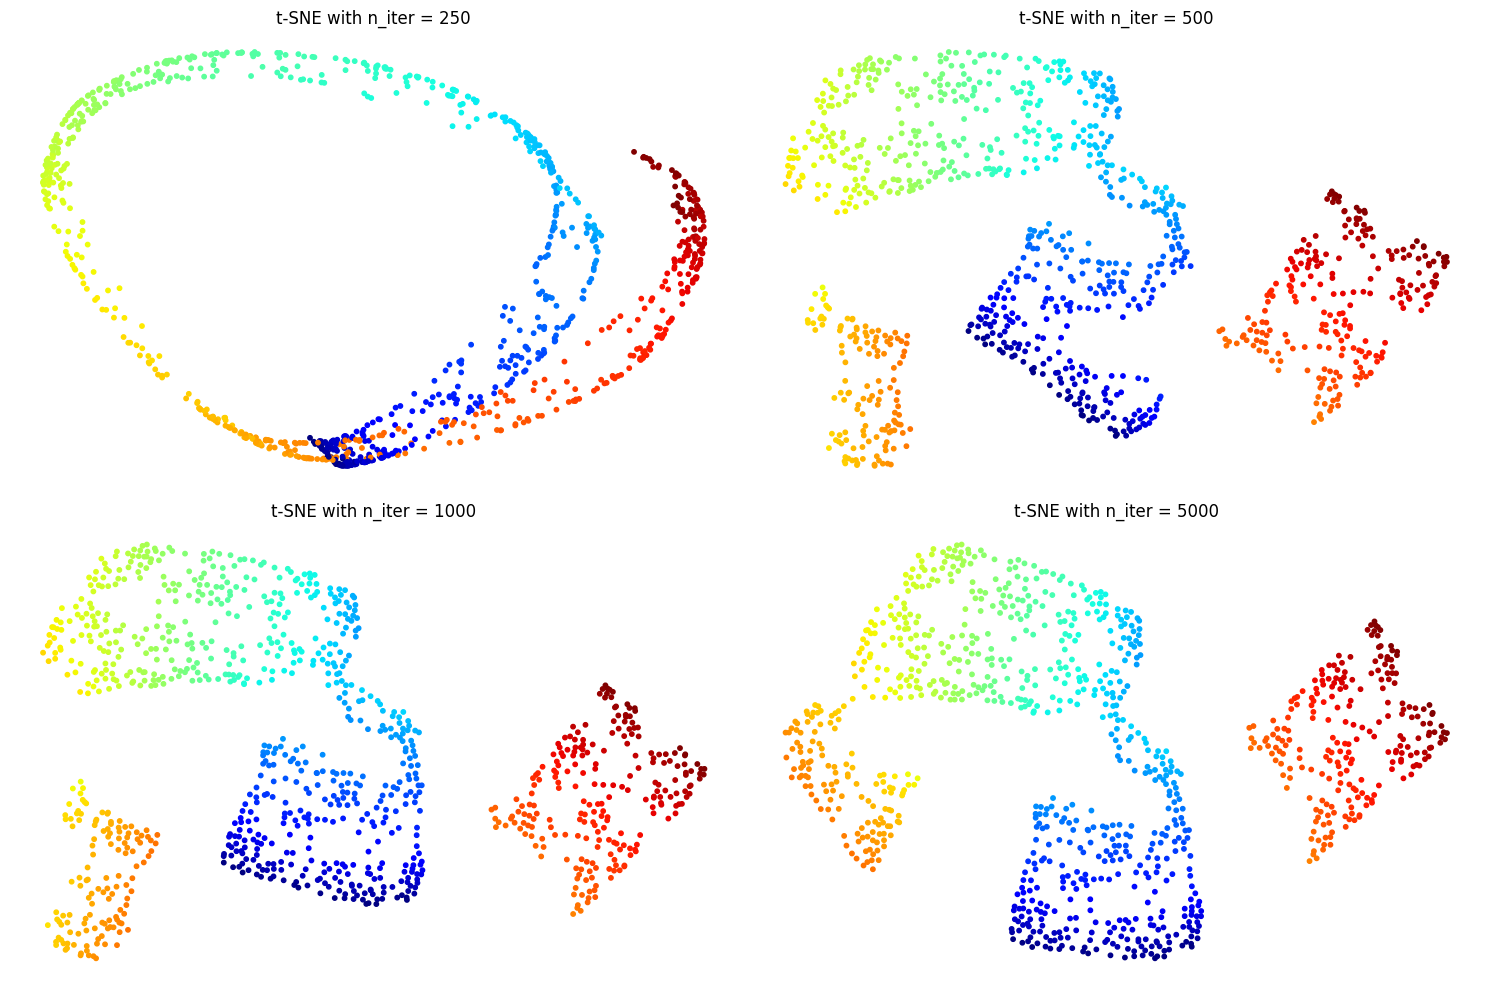

In [18]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3D Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1000)

# Perplexity value
perplexity = 50

# Different n_iter values to try
n_iter_values = [250, 500, 1000, 5000]

# Prepare the plot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Apply t-SNE with different n_iter values and plot
for i, n_iter in enumerate(n_iter_values):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
    X_tsne = tsne.fit_transform(X)

    ax = axes[i]
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='jet', s=10)
    ax.set_title(f't-SNE with n_iter = {n_iter}')
    ax.axis('off')

# Remove the empty subplot (if any)
for i in range(len(n_iter_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
